# Analysis of global publication volume

Import helper functions

In [1]:
import sys
import os

folder_path = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

sys.path.append(os.path.abspath(os.path.join(folder_path, '..')))

from csv_analysis import *


In [2]:
df = read_first_n_rows("../data/collaboration/works_year_countries.csv", nrows=15)
df

,work_id,publication_year,countries
0,https://openalex.org/W143756818,1998,Germany
1,https://openalex.org/W1437651587,1973,Czechia
2,https://openalex.org/W143770321,2000,China
3,https://openalex.org/W1437735228,2003,United States
4,https://openalex.org/W143773981,2002,Belgium
5,https://openalex.org/W143775390,2001,Israel
6,https://openalex.org/W1437804358,2015,Australia
7,https://openalex.org/W143781885,2012,Canada
8,https://openalex.org/W1437876792,2015,United States
9,https://openalex.org/W143791697,2009,France


In [4]:
file_path = "../data/collaboration/works_year_countries.csv"
df_all = pd.read_csv(file_path, delimiter=',')

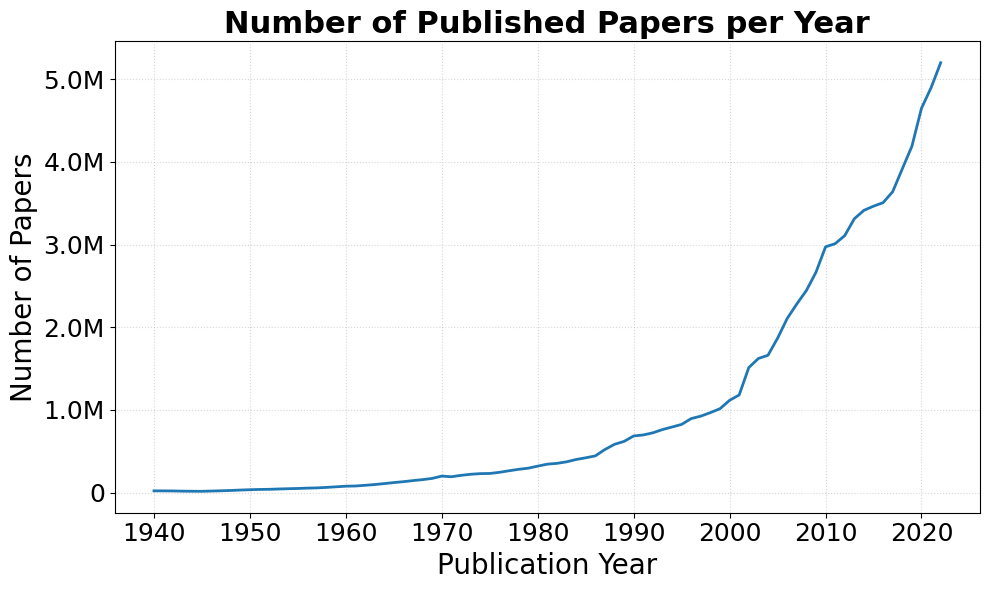

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

def plot_records_by_year(df, start_year=None, end_year=None):
    """
    Plot the number of records per publication year as a line chart
    with readable Y axis formatting, smart X tick spacing, and larger font sizes.
    """
    # Convert publication_year to numeric
    df = df.copy()
    df['publication_year'] = pd.to_numeric(df['publication_year'], errors='coerce')

    # Filter by year range
    if start_year is not None:
        df = df[df['publication_year'] >= start_year]
    if end_year is not None:
        df = df[df['publication_year'] <= end_year]

    # Count records per year
    count_by_year = df['publication_year'].value_counts().sort_index()

    # Prepare figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Line chart
    ax.plot(count_by_year.index.astype(int), count_by_year.values, linewidth=2)

    # Y axis formatter: 1.2M, 850K, etc.
    def yfmt(x, _pos):
        if x >= 1_000_000:
            return f"{x/1_000_000:.1f}M"
        if x >= 1_000:
            return f"{x/1_000:.0f}K"
        return f"{int(x)}"
    ax.yaxis.set_major_formatter(FuncFormatter(yfmt))

    # Smart tick spacing on X: limit to about 10 ticks and keep them integer years
    ax.xaxis.set_major_locator(MaxNLocator(nbins=10, integer=True))

    # Labels and styling with bigger font
    ax.set_title("Number of Published Papers per Year", fontsize=22, fontweight='bold')
    ax.set_xlabel("Publication Year", fontsize=20)
    ax.set_ylabel("Number of Papers", fontsize=20)

    # Increase tick label font size
    ax.tick_params(axis='both', which='major', labelsize=18)

    # Grid styling
    ax.grid(axis="both", linestyle=":", alpha=0.5)

    plt.tight_layout()
    plt.show()


# Example usage
start_year = 1940
end_year = 2022
plot_records_by_year(df_all, start_year, end_year)
